### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/ham10000/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,dx,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,nv,train,0.017459,-0.006133,0.042509,0.032119,-0.020298,-0.029999,-0.019345,-0.005980,...,-0.085103,-0.035549,0.022616,0.014842,-0.010682,0.007425,-0.010183,0.059058,0.028891,0.073401
1,nv,train,0.013314,-0.004718,0.036896,0.013657,-0.018710,-0.000790,-0.018275,0.021898,...,-0.024121,0.001504,0.007381,0.028216,-0.033343,-0.007173,0.025764,0.037911,-0.028967,0.032034
2,akiec,train,0.023076,-0.006460,0.046531,-0.007525,-0.052272,0.024759,-0.004904,0.024593,...,-0.076046,-0.025927,0.019258,0.013950,-0.013910,0.000220,-0.016514,0.060165,0.028732,0.068683
3,nv,train,0.002341,-0.042092,0.056254,0.000176,-0.013943,0.011410,0.002411,0.001611,...,-0.017013,-0.020450,0.020093,0.021699,-0.018428,0.018907,0.022027,0.045309,-0.014772,0.017288
4,nv,train,0.012029,-0.003644,0.028491,0.017455,-0.017562,-0.005040,0.016783,0.031028,...,-0.093017,-0.022929,0.013042,0.007998,-0.020830,-0.015631,-0.007309,0.057171,0.030298,0.068561


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'dx'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 132359


STAGE:2024-02-07 16:59:16 19849:19849 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6405
Epoch 1/15 - Training Time: 0.72 seconds | Inference Time: 0.19 seconds
Epoch 2/15 - Test Accuracy: 0.7524
Epoch 2/15 - Training Time: 0.64 seconds | Inference Time: 0.17 seconds
Epoch 3/15 - Test Accuracy: 0.6945
Epoch 3/15 - Training Time: 0.56 seconds | Inference Time: 0.17 seconds
Epoch 4/15 - Test Accuracy: 0.7833
Epoch 4/15 - Training Time: 0.56 seconds | Inference Time: 0.18 seconds
Epoch 5/15 - Test Accuracy: 0.7678
Epoch 5/15 - Training Time: 0.63 seconds | Inference Time: 0.17 seconds
Epoch 6/15 - Test Accuracy: 0.7993
Epoch 6/15 - Training Time: 0.68 seconds | Inference Time: 0.20 seconds
Epoch 7/15 - Test Accuracy: 0.7898
Epoch 7/15 - Training Time: 0.67 seconds | Inference Time: 0.18 seconds
Epoch 8/15 - Test Accuracy: 0.7129
Epoch 8/15 - Training Time: 0.58 seconds | Inference Time: 0.20 seconds
Epoch 9/15 - Test Accuracy: 0.7688
Epoch 9/15 - Training Time: 0.68 seconds | Inference Time: 0.18 seconds
Epoch 10/15 - Test Accuracy: 0.7763
E

STAGE:2024-02-07 16:59:31 19849:19849 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 16:59:31 19849:19849 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.67%        1.081s        54.24%        6.063s       3.208ms    -471.49 Mb    -480.14 Mb          1890  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        39.24%        4.387s        39.84%        4.453s       1.856ms     589.91 Mb     588.99 Mb          2400  
                              Optimizer.step#AdamW.step         6.58%     735.088ms        21.24%        2.374s       1.256ms       1.01 Mb      -1.85

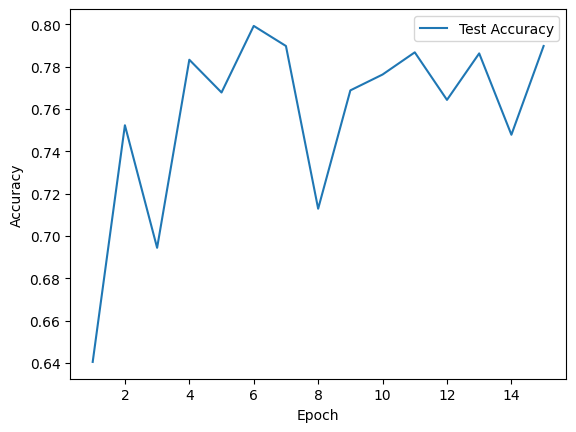

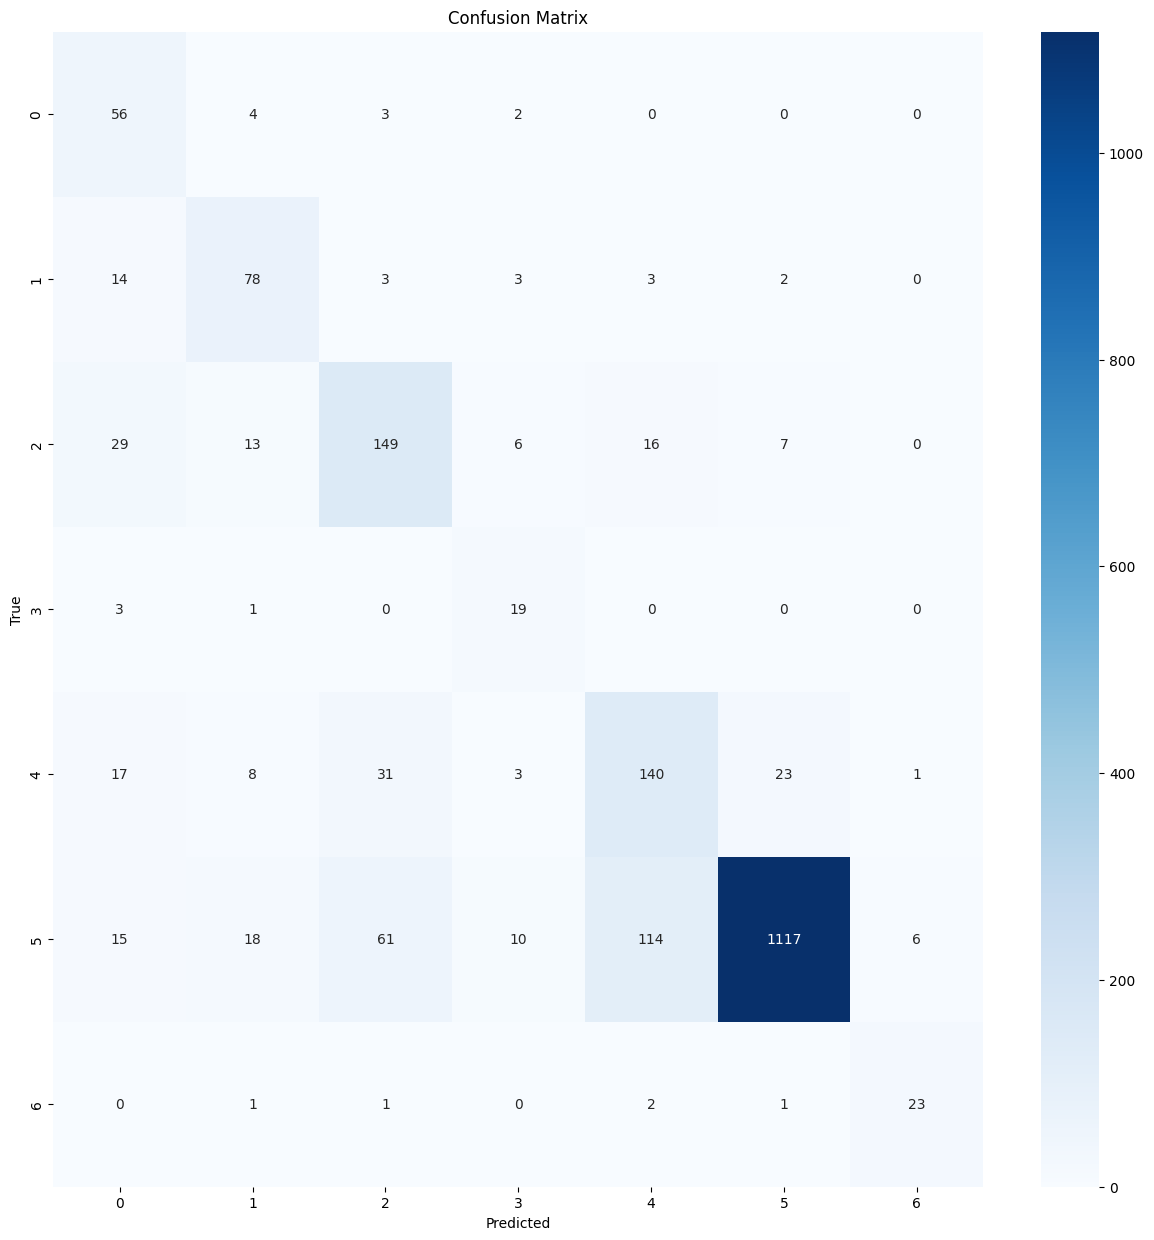

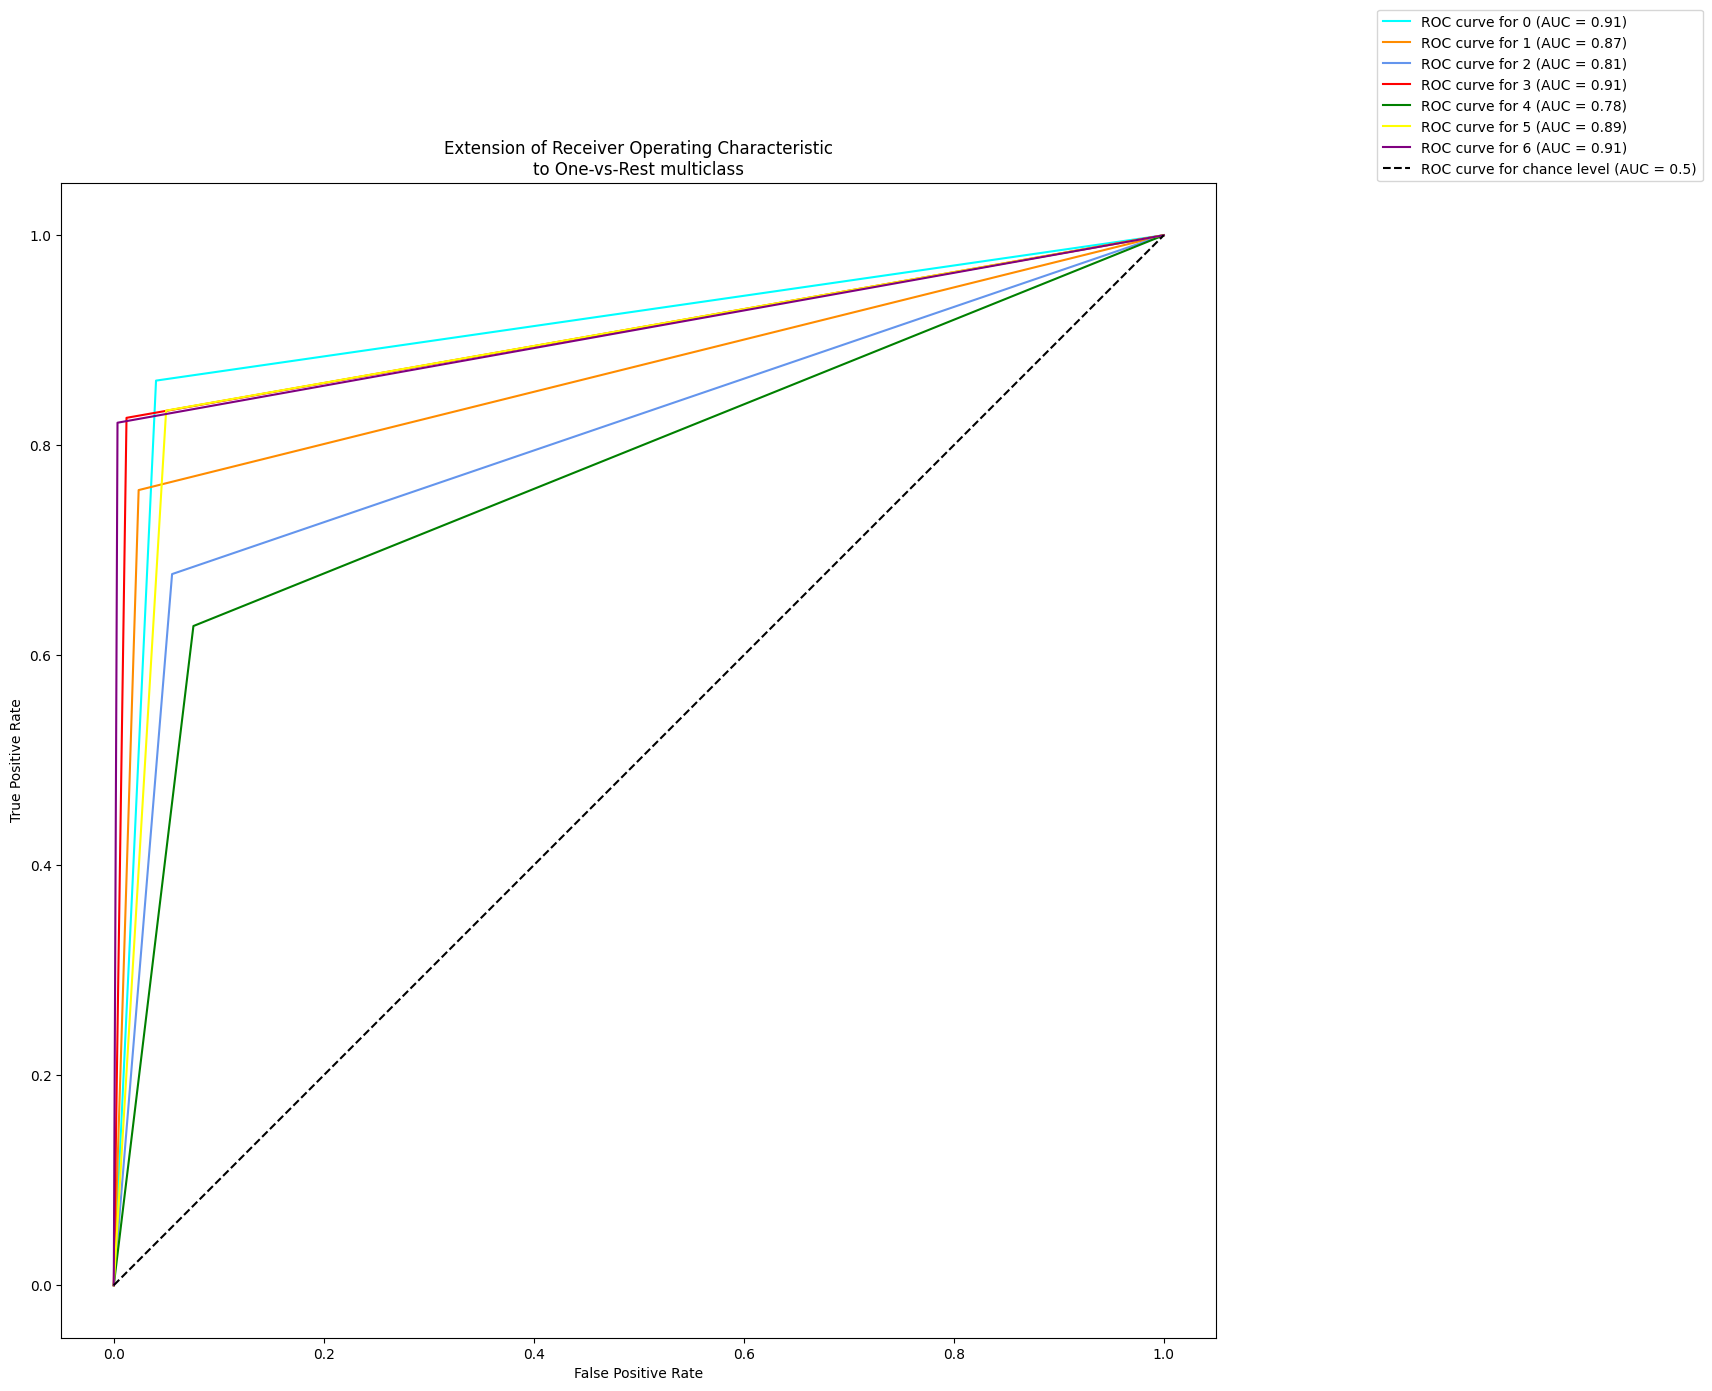

              precision    recall  f1-score   support

           0       0.42      0.86      0.56        65
           1       0.63      0.76      0.69       103
           2       0.60      0.68      0.64       220
           3       0.44      0.83      0.58        23
           4       0.51      0.63      0.56       223
           5       0.97      0.83      0.90      1341
           6       0.77      0.82      0.79        28

    accuracy                           0.79      2003
   macro avg       0.62      0.77      0.67      2003
weighted avg       0.83      0.79      0.80      2003



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66823


STAGE:2024-02-07 17:00:50 19849:19849 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6286
Epoch 1/15 - Training Time: 0.98 seconds | Inference Time: 0.31 seconds
Epoch 2/15 - Test Accuracy: 0.7783
Epoch 2/15 - Training Time: 1.01 seconds | Inference Time: 0.32 seconds
Epoch 3/15 - Test Accuracy: 0.7868
Epoch 3/15 - Training Time: 1.07 seconds | Inference Time: 0.32 seconds
Epoch 4/15 - Test Accuracy: 0.7743
Epoch 4/15 - Training Time: 1.13 seconds | Inference Time: 0.33 seconds
Epoch 5/15 - Test Accuracy: 0.7549
Epoch 5/15 - Training Time: 1.03 seconds | Inference Time: 0.30 seconds
Epoch 6/15 - Test Accuracy: 0.7314
Epoch 6/15 - Training Time: 1.05 seconds | Inference Time: 0.31 seconds
Epoch 7/15 - Test Accuracy: 0.7878
Epoch 7/15 - Training Time: 1.07 seconds | Inference Time: 0.30 seconds
Epoch 8/15 - Test Accuracy: 0.7659
Epoch 8/15 - Training Time: 0.98 seconds | Inference Time: 0.31 seconds
Epoch 9/15 - Test Accuracy: 0.7728
Epoch 9/15 - Training Time: 1.09 seconds | Inference Time: 0.33 seconds
Epoch 10/15 - Test Accuracy: 0.7733
E

STAGE:2024-02-07 17:01:13 19849:19849 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 17:01:13 19849:19849 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.67%        1.392s        63.65%       10.213s       4.309ms    -588.40 Mb    -596.92 Mb          2370  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        35.89%        5.760s        36.31%        5.827s       2.428ms     589.91 Mb     588.99 Mb          2400  
                              Optimizer.step#AdamW.step         6.40%        1.027s        30.69%        4.925s       2.606ms     522.09 Kb    -948.76

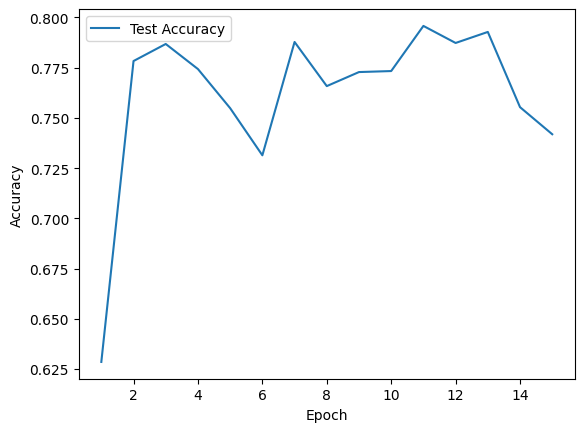

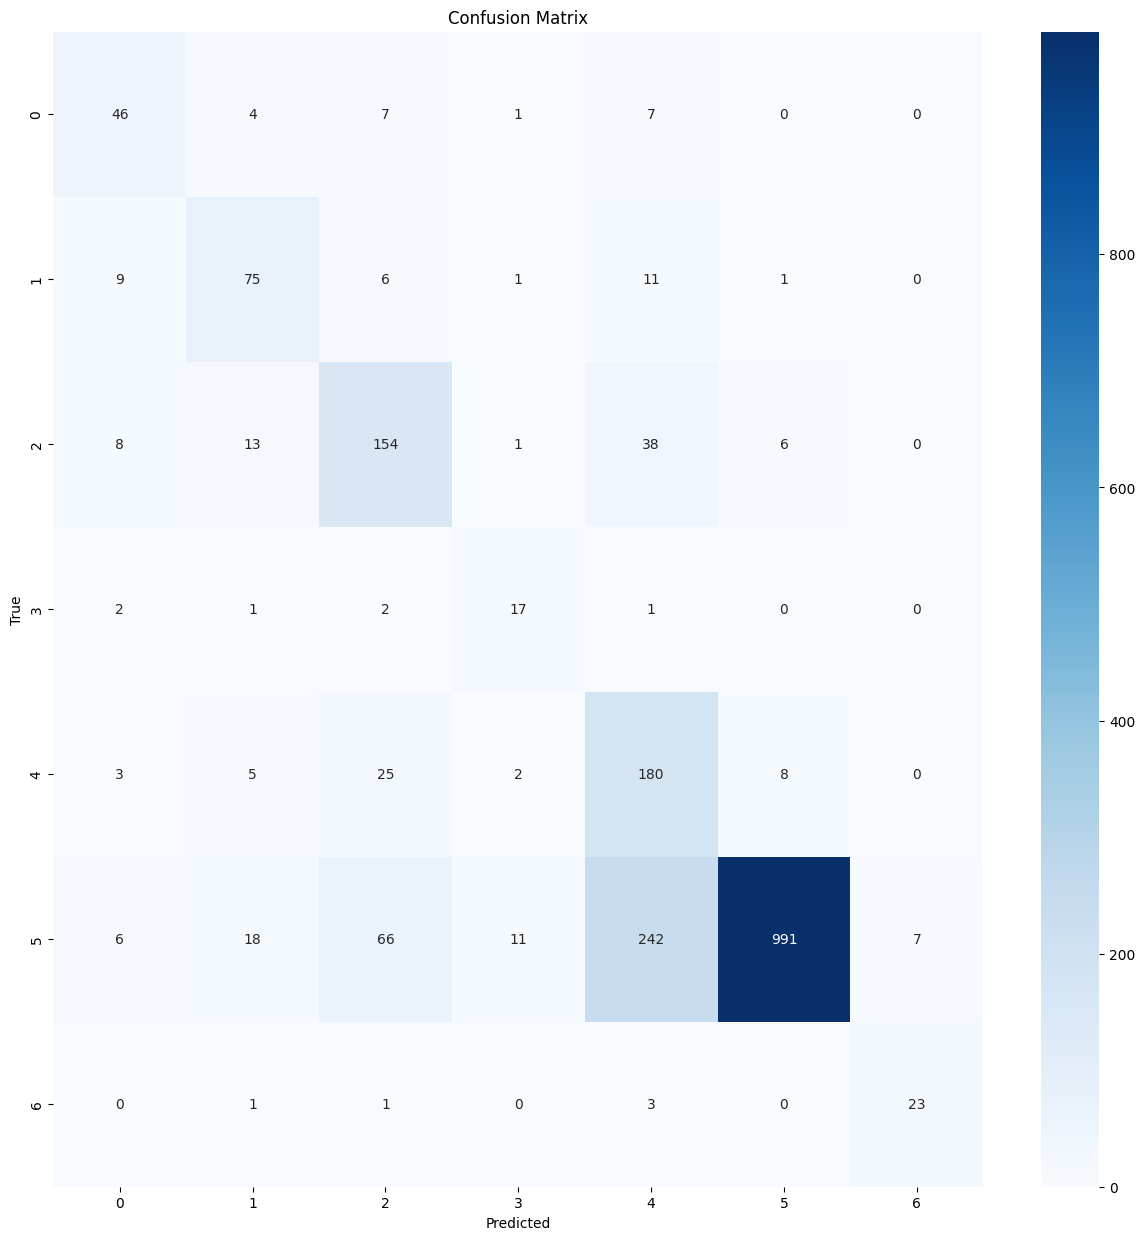

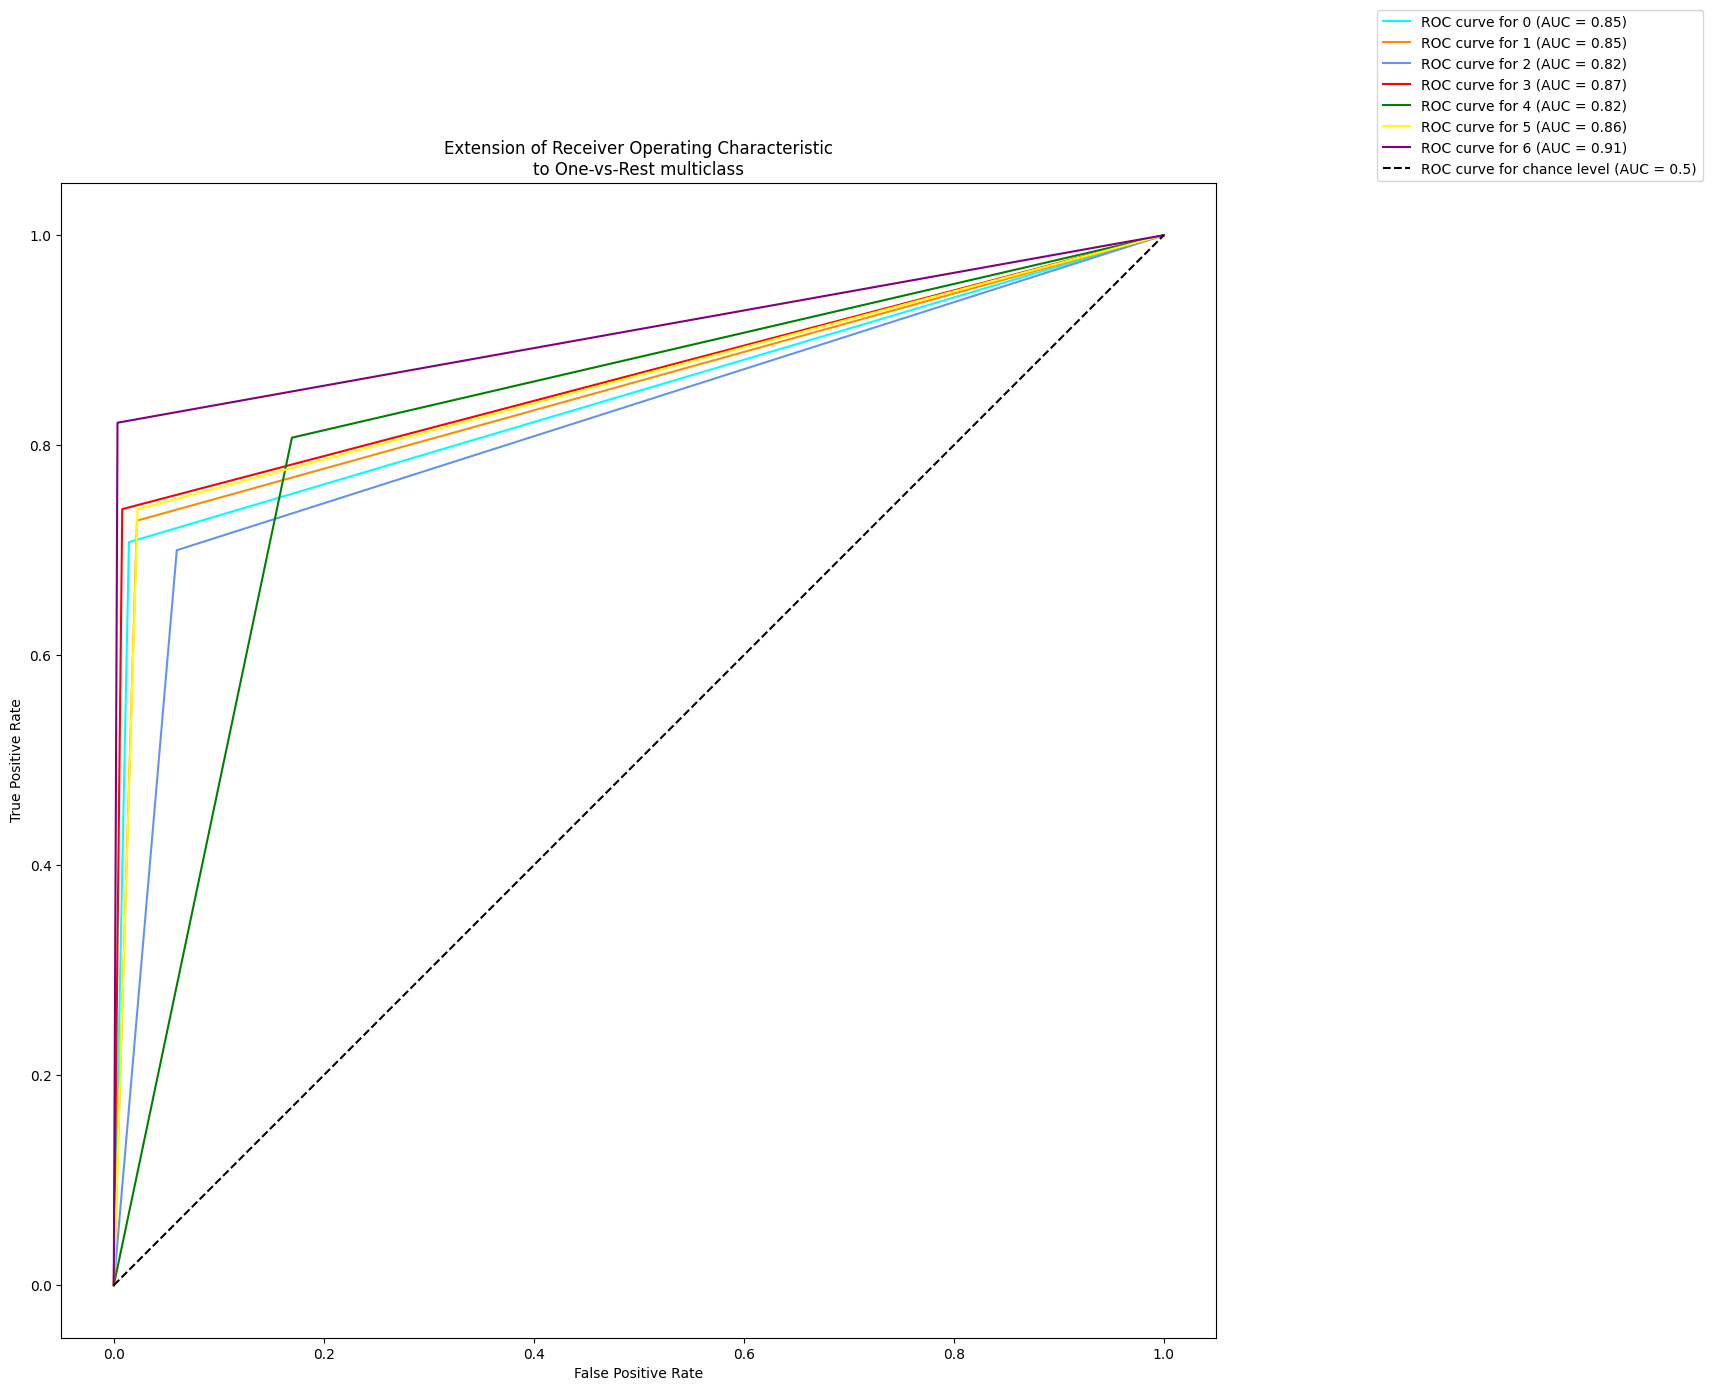

              precision    recall  f1-score   support

           0       0.62      0.71      0.66        65
           1       0.64      0.73      0.68       103
           2       0.59      0.70      0.64       220
           3       0.52      0.74      0.61        23
           4       0.37      0.81      0.51       223
           5       0.99      0.74      0.84      1341
           6       0.77      0.82      0.79        28

    accuracy                           0.74      2003
   macro avg       0.64      0.75      0.68      2003
weighted avg       0.84      0.74      0.77      2003



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)